# Analysis & Visualization

In this notebook, I will use the dataset generated on the previos step to run a small analysis on the data and visualize the results.

## 1. Setup and Imports

In [10]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Previous Results

Load intermediate results from previus notebook.

In [4]:
trip_weather_data_2020_10 = pd.read_parquet('../intermediate_results/202010-trip-and-weather-data-clean.parquet', engine='fastparquet')
trip_weather_data_2020_10.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,datetime,tempmax,tempmin,temp,humidity,precip,snow,windgust,windspeed,visibility
0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.540,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,...,2020-10-01,70.9,60.7,65.2,60.69,0.0,0.0,21.9,10.0,9.9
1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.571,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,...,2020-10-01,70.9,60.7,65.2,60.69,0.0,0.0,21.9,10.0,9.9
2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.084,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,...,2020-10-01,70.9,60.7,65.2,60.69,0.0,0.0,21.9,10.0,9.9
3,233,2020-10-01 00:00:25.008,2020-10-01 00:04:18.641,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,...,2020-10-01,70.9,60.7,65.2,60.69,0.0,0.0,21.9,10.0,9.9
4,126,2020-10-01 00:00:25.310,2020-10-01 00:02:32.133,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,...,2020-10-01,70.9,60.7,65.2,60.69,0.0,0.0,21.9,10.0,9.9


## 3. Analysis & Visualization

### Rides by hour 

View ride distribution over the day.

In [6]:
trip_weather_data_2020_10['starttime'] = pd.to_datetime(trip_weather_data_2020_10['starttime'])
trip_weather_data_2020_10['start hour']=trip_weather_data_2020_10['starttime'].dt.hour.astype('category')
trip_weather_data_2020_10['start day']=trip_weather_data_2020_10['starttime'].dt.day.astype('category')
trip_weather_data_2020_10['weekday']=trip_weather_data_2020_10['starttime'].dt.weekday.astype('category')
trip_weather_data_2020_10['weekend'] = [ d >=5 for d in trip_weather_data_2020_10['weekday']]

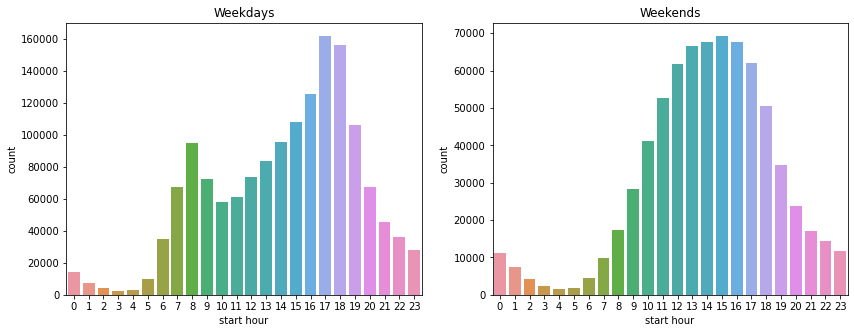

In [11]:
fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=trip_weather_data_2020_10[~trip_weather_data_2020_10['weekend']],x="start hour" , ax=ax[0]).set_title("Weekdays")
sns.countplot(data=trip_weather_data_2020_10[trip_weather_data_2020_10['weekend']],x="start hour" , ax=ax[1]).set_title("Weekends") ;

### Rides by Day

Show rides by day of month.

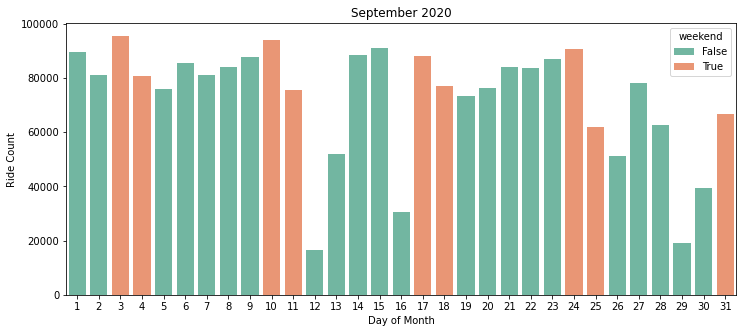

In [12]:
plt.figure(figsize=(12,5))
sns.set_palette("Set2")
ax=sns.countplot(data=trip_weather_data_2020_10,x="start day" , hue='weekend' , dodge=False ) 
ax.set(xlabel="Day of Month", ylabel = "Ride Count", title='September 2020') ;

### Precipitation

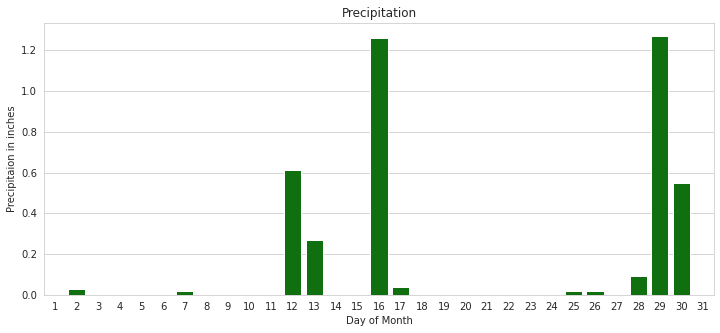

In [16]:
trip_weather_data_2020_10['day'] = trip_weather_data_2020_10['datetime'].dt.day

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
ax = sns.barplot (data=trip_weather_data_2020_10, y="precip",  x='day', color="green" ) 
ax.set(xlabel="Day of Month", ylabel = "Precipitaion in inches", title="Precipitation") ;

### Wind

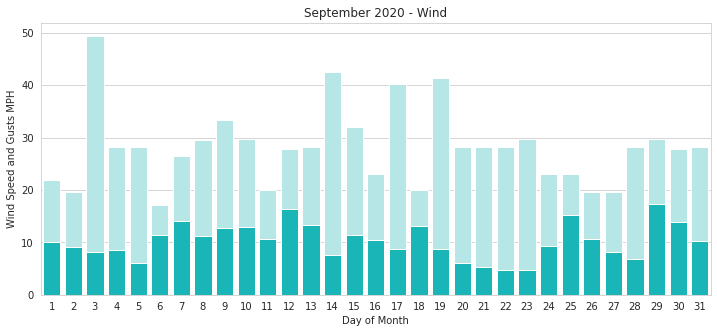

In [17]:
plt.figure(figsize=(12,5))
sns.barplot (data=trip_weather_data_2020_10, y="windgust", x='day', color="paleturquoise") ; 
overlay = sns.barplot(data=trip_weather_data_2020_10, x='day', y='windspeed' , color = "darkturquoise")
overlay.set(ylabel="Wind Speed and Gusts MPH", xlabel="Day of Month", title='September 2020 - Wind');

### Temperatures for each day

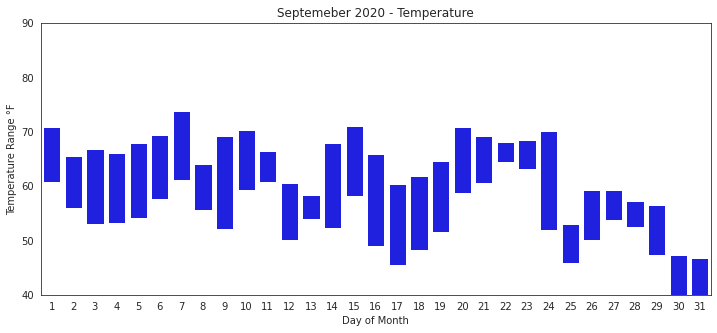

In [19]:
sns.set_style("white")
plt.figure(figsize=(12,5))

# Main plot - Maximum Temperature 
sns.barplot(data=trip_weather_data_2020_10, x='day',  y='tempmax' , color="blue" ) 
# overlay - Mininum Temperature - whiteout 
overlay = sns.barplot(data=trip_weather_data_2020_10, x='day', y='tempmin', color="white")

overlay.set(ylabel="Temperature Range °F",\
  xlabel="Day of Month", title='Septemeber 2020 - Temperature');
overlay.set_ylim(40,90) ; # show temperature range 40° to 90°